#Dependências

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd

/tmp/ipython-input-4150328498.py:4: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.ndarray.
  from numpy.core.multiarray import ndarray


# Configuração dos Gráficos

In [20]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [21]:
def gera_parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

In [22]:
def normalize(array):
  return (array - array.min()) / (array.max() - array.min())

#Dataset e Normalização

In [23]:
# idades = np.array([18, 20, 25, 28, 30, 32, 40, 50, 55, 65, 70])
idades = np.arange(18, 91, 2)

n_idades = normalize(idades)
n_valores = gera_parabola(n_idades)
valores = n_valores * 10000

print(n_idades)
print(n_valores)

[0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.19444444 0.22222222 0.25       0.27777778 0.30555556
 0.33333333 0.36111111 0.38888889 0.41666667 0.44444444 0.47222222
 0.5        0.52777778 0.55555556 0.58333333 0.61111111 0.63888889
 0.66666667 0.69444444 0.72222222 0.75       0.77777778 0.80555556
 0.83333333 0.86111111 0.88888889 0.91666667 0.94444444 0.97222222
 1.        ]
[0.78052013 0.72604835 0.65251848 0.61920626 0.58003752 0.53607253
 0.50362666 0.40418458 0.3921599  0.39301859 0.34873473 0.31390512
 0.29970471 0.3153663  0.27016239 0.27544453 0.26550007 0.23019378
 0.22905548 0.23060798 0.22889242 0.23501116 0.23000603 0.27521086
 0.25185038 0.26396585 0.34070516 0.32692321 0.33347735 0.392314
 0.42582031 0.44930028 0.48715044 0.50254852 0.57716508 0.62845429
 0.67700557]


Text(0.5, 1.0, 'Valor do seguro em função da idade')

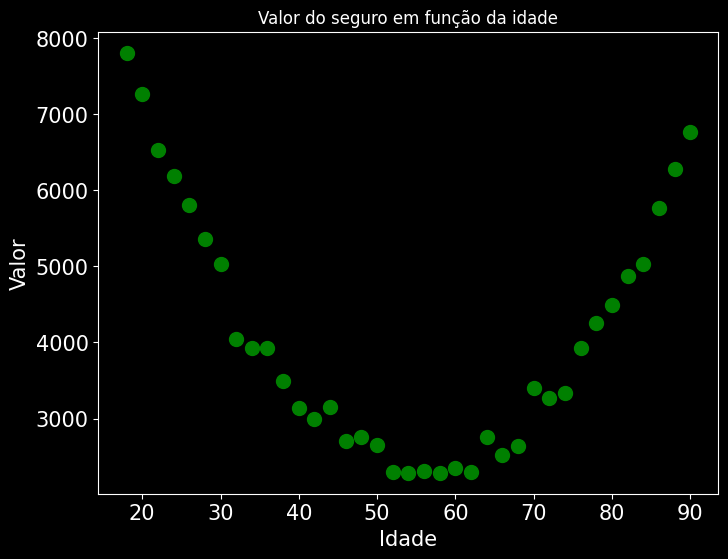

In [24]:
plt.scatter(idades,valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade', fontdict={'size':12})

Text(0.5, 1.0, 'Valor do seguro em função da idade (Normalizados)')

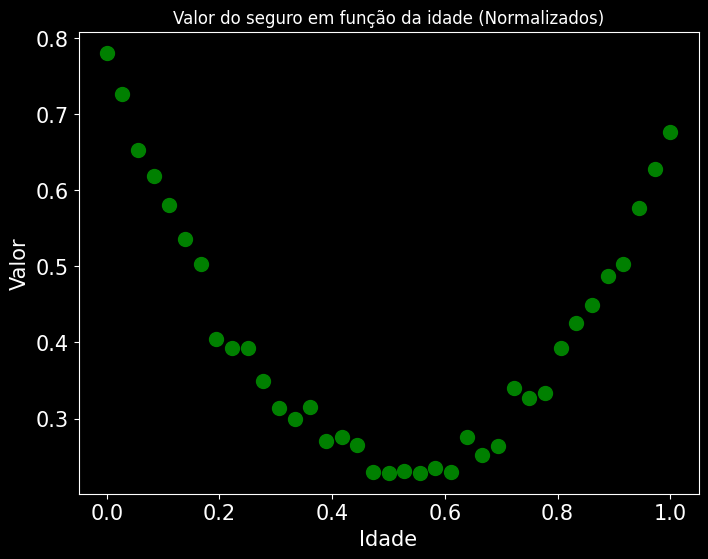

In [25]:
plt.scatter(n_idades,n_valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (Normalizados)', fontdict={'size':12})

In [26]:
df = pd.DataFrame({'idade':n_idades, 'valor': n_valores})
df

,idade,valor
0,0.000000,0.780520
1,0.027778,0.726048
2,0.055556,0.652518
3,0.083333,0.619206
4,0.111111,0.580038
5,0.138889,0.536073
6,0.166667,0.503627
7,0.194444,0.404185
8,0.222222,0.392160
9,0.250000,0.393019


# Arquitetura do Modelo

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

adam = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=adam, loss='mse')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

# Treinamento

In [28]:
log = model.fit(n_idades, n_valores, epochs=400)
losses = log.history['loss']

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2832 
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0391
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0838
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1020
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0602
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0304
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0347
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0417
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0416
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0294
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0276
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0298
Epoch 13/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0340
Epoch 14/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0320
Epoch 15/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0271
Epoch 16/400
2/2 ━

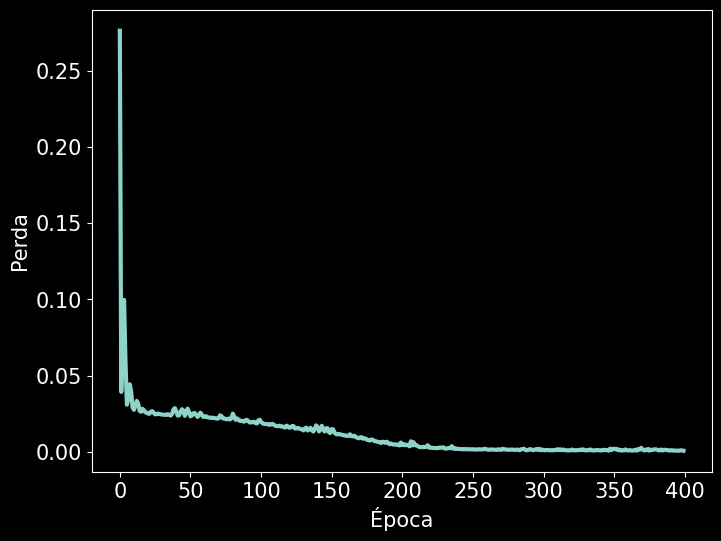

In [29]:
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

#Teste

In [30]:
n_idades_teste = np.arange(0, 1.1, 0.1)

print(n_idades)
print(n_idades_teste)

n_valores_n1 = []
n_valores_n2 = []

weights, biases = model.layers[0].get_weights()

for i in n_idades_teste:
  n_valores_n1.append(i * weights[0][0] + biases[0])
  n_valores_n2.append(i * weights[0][1] + biases[1])

n_valores_n1 = np.array(n_valores_n1)
n_valores_n2 = np.array(n_valores_n2)


[0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.19444444 0.22222222 0.25       0.27777778 0.30555556
 0.33333333 0.36111111 0.38888889 0.41666667 0.44444444 0.47222222
 0.5        0.52777778 0.55555556 0.58333333 0.61111111 0.63888889
 0.66666667 0.69444444 0.72222222 0.75       0.77777778 0.80555556
 0.83333333 0.86111111 0.88888889 0.91666667 0.94444444 0.97222222
 1.        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


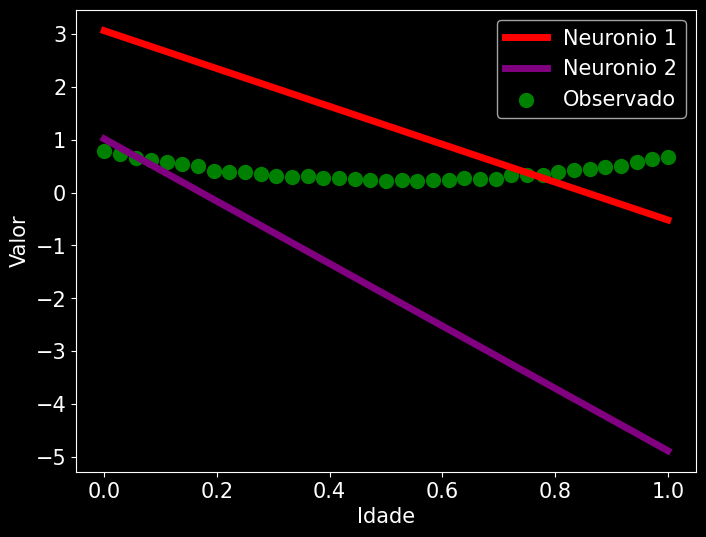

In [31]:
plt.plot(n_idades_teste, n_valores_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [32]:
n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_l1 = model.layers[0](np.array([i])[:,None])

  n_valores_ativados_n1.append(n_valores_l1[0][0])
  n_valores_ativados_n2.append(n_valores_l1[0][1])

n_valores_ativados_n1 = np.array(n_valores_ativados_n1)
n_valores_ativados_n2 = np.array(n_valores_ativados_n2)



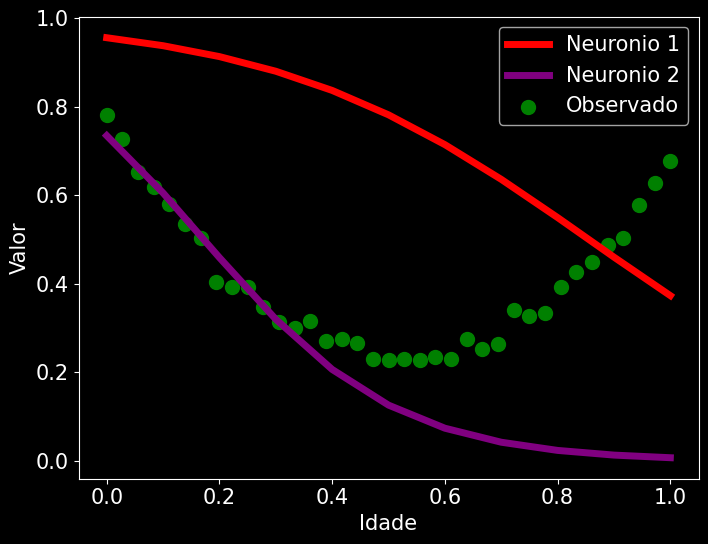

In [33]:
plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

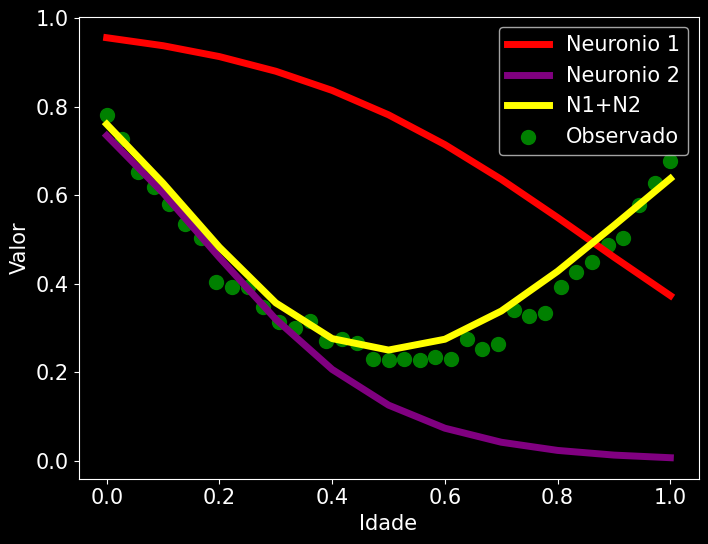

In [34]:
weights, biases = model.layers[1].get_weights()
n1n2 = n_valores_ativados_n1 * weights[0] + n_valores_ativados_n2 * weights[1] + biases[0]

plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')
plt.plot(n_idades_teste, n1n2, color="yellow", lw=5, label = 'N1+N2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [35]:
n_idades_teste = np.arange(0.1, 1.5, 0.1)

n_valores_teste = []

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_teste.append(model.predict(np.array([i]))[0][0])

n_valores_teste = np.array(n_valores_teste)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


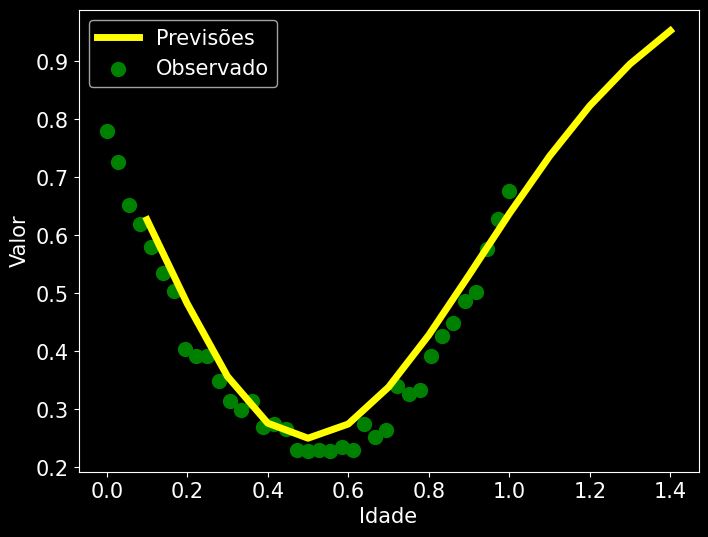

In [36]:
plt.plot(n_idades_teste, n_valores_teste, color="yellow", lw=5, label = 'Previsões')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()